### Dataset saya berubah menjadi Student Performance
### sebelumnya adalah Data Analyst Job Roles in Canada
#### Sumber: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data


#### import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter 
from pandas.api.types import is_numeric_dtype

In [3]:
# mendapatkan row dan col dari data

df = pd.read_csv('StudentPerformanceFactors.csv')
row, col = df.shape
print(f'row = {row}')
print(f'column = {col}')
print(df.info())

row = 6607
column = 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence           

### Terdapat 20 kolum dan 6670 row
#### apa isinya dari masing-masing kolom? 

In [4]:
df.head(5) # ambil 5 teratas

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.tail(5) # saya ambil 5 terbawah

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
df.isna().sum() # lihat apakah ada yang kosong dari totalnya

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df = df.dropna() # drop row jika ada salah satu value dari row tersebut yang kosong

In [8]:
df.isna().sum() # cek lagi

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Mencari tahu value dari masing-masing kolom; apakah angka atau string 

In [9]:
lst = df.columns

# pisahkan yang string dan angka
col_angka = [] 
col_selain_angka = []

for col in lst:
    print(col, end=' = ')
    if (is_numeric_dtype(df[col])):
        print(f"tipe data kolum ini {df[col].dtype}", end=' ')
        col_angka.append(col)
    else:
        print(sorted(df[col].unique()), end=' ') # dapatkan semua value unique dari column
        col_selain_angka.append(col)
    print()

print()
print()
print("yang berupa angka", col_angka)
print("yang tidak berupa angka", col_selain_angka)

Hours_Studied = tipe data kolum ini int64 
Attendance = tipe data kolum ini int64 
Parental_Involvement = ['High', 'Low', 'Medium'] 
Access_to_Resources = ['High', 'Low', 'Medium'] 
Extracurricular_Activities = ['No', 'Yes'] 
Sleep_Hours = tipe data kolum ini int64 
Previous_Scores = tipe data kolum ini int64 
Motivation_Level = ['High', 'Low', 'Medium'] 
Internet_Access = ['No', 'Yes'] 
Tutoring_Sessions = tipe data kolum ini int64 
Family_Income = ['High', 'Low', 'Medium'] 
Teacher_Quality = ['High', 'Low', 'Medium'] 
School_Type = ['Private', 'Public'] 
Peer_Influence = ['Negative', 'Neutral', 'Positive'] 
Physical_Activity = tipe data kolum ini int64 
Learning_Disabilities = ['No', 'Yes'] 
Parental_Education_Level = ['College', 'High School', 'Postgraduate'] 
Distance_from_Home = ['Far', 'Moderate', 'Near'] 
Gender = ['Female', 'Male'] 
Exam_Score = tipe data kolum ini int64 


yang berupa angka ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 

### Lihat persebaran nilai ujian dari kolom Exam_Score

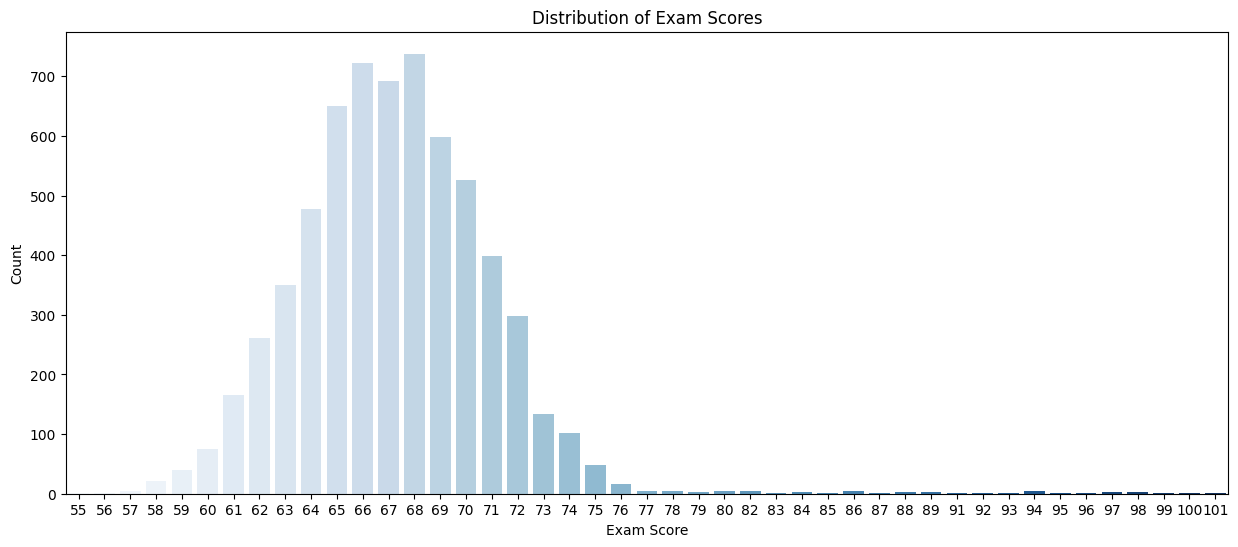

In [10]:
plt.figure(figsize=(15, 6)) # perbesar canvas supaya axis x tidak saling tindih
sns.countplot(x=df['Exam_Score'], palette='Blues', legend=0, hue=df['Exam_Score']) # kasih warna
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")

plt.show() # tampilkan

### Berapa rata-rata, median, dan modus nilai ujian dari grafik diatas?

In [11]:
print(df['Exam_Score'].mean()) # rata-rata
print(df['Exam_Score'].median()) # median
print(df['Exam_Score'].mode()[0]) # modus

67.25211665098777
67.0
68


### Rata-rata 67
### nilai tengah = 67 juga
### nilai paling banyak didapatkan = 68

### ---

### Menurut saya, yang paling berpengaruh adalah motivasi untuk belajar.
#### Berikut adalah visualisasi data pada motivasi belajar dengan rata-rata nilai yang didapat

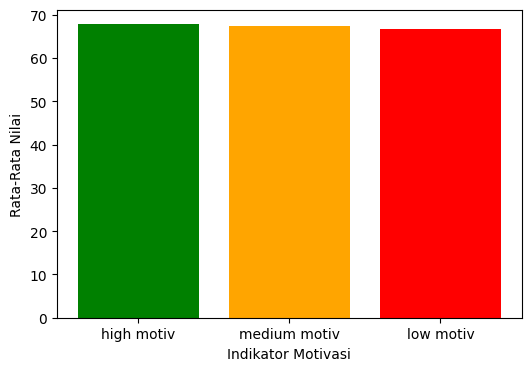

In [12]:


high_motiv_mean = (df[df['Motivation_Level'] == 'High']['Exam_Score'].mean()) # ambil rata rata dimana motivasi belajar = High
medium_motiv_mean = (df[df['Motivation_Level'] == 'Medium']['Exam_Score'].mean()) # ambil rata rata dimana motivasi belajar = Medium
low_motiv_mean = (df[df['Motivation_Level'] == 'Low']['Exam_Score'].mean()) # ambil rata rata dimana motivasi belajar = Low

categories = [high_motiv_mean, medium_motiv_mean, low_motiv_mean]
label = ["high motiv", "medium motiv", "low motiv"]

plt.figure(figsize=(6, 4))
plt.bar(label, categories, color=["green", "orange", "red"])

plt.xlabel("Indikator Motivasi")
plt.ylabel("Rata-Rata Nilai")
plt.show()


### Data menunjukkan sedikit perbedaan pada rata-rata nilai apapun motivasinya 
#### Dengan kata lain; terdapat faktor lain yang mempengaruhi

#### Apakah ada hubunganya dengan Teacher's Quality?

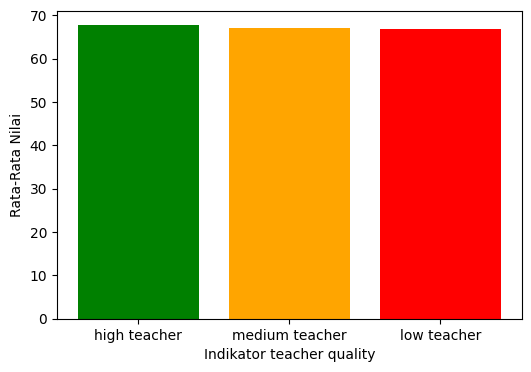

In [14]:

high_teacher_mean= (df[df['Teacher_Quality'] == 'High']['Exam_Score'].mean()) 
medium_teacher_mean = (df[df['Teacher_Quality'] == 'Medium']['Exam_Score'].mean())
low_teacher_mean = (df[df['Teacher_Quality'] == 'Low']['Exam_Score'].mean()) 

categories = [high_teacher_mean, medium_teacher_mean, low_teacher_mean]
label = ["high teacher", "medium teacher", "low teacher"]

plt.figure(figsize=(6, 4))
plt.bar(label, categories, color=["green", "orange", "red"])

plt.xlabel("Indikator teacher quality")
plt.ylabel("Rata-Rata Nilai")
plt.show()

### Tidak ada perbedaan yang jauh
#### Berikut jika indikator berupa Access_to_Resources

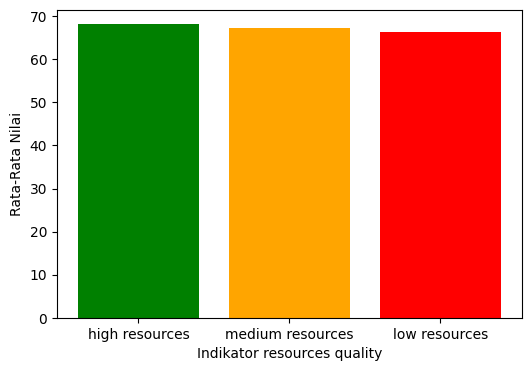

In [15]:
high_resources_mean= (df[df['Access_to_Resources'] == 'High']['Exam_Score'].mean()) 
medium_resources_mean = (df[df['Access_to_Resources'] == 'Medium']['Exam_Score'].mean())
low_resources_mean = (df[df['Access_to_Resources'] == 'Low']['Exam_Score'].mean()) 

categories = [high_resources_mean, medium_resources_mean, low_resources_mean]
label = ["high resources", "medium resources", "low resources"]

plt.figure(figsize=(6, 4))
plt.bar(label, categories, color=["green", "orange", "red"])

plt.xlabel("Indikator resources quality")
plt.ylabel("Rata-Rata Nilai")
plt.show()

### Berikut relasi antara Lama belajar dengan nilai ujian

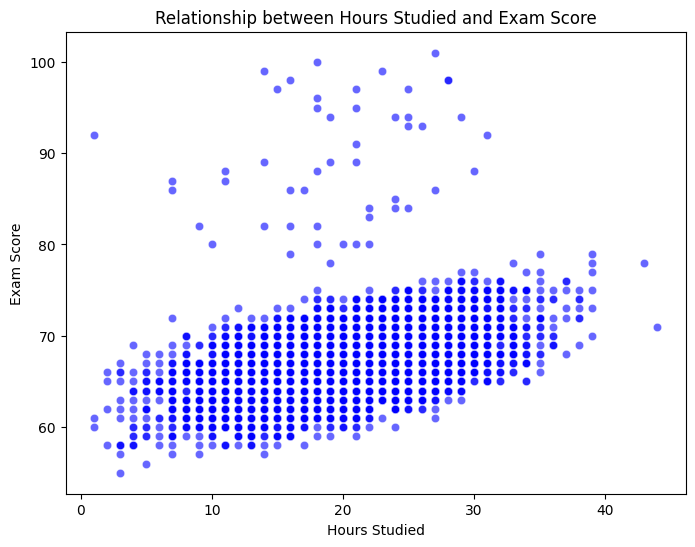

relasi antara hours studied dengan nilai ujian dengan interval [0 - 1] =  0.44510414026511724


In [26]:

plt.figure(figsize=(8,6))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df, color="blue", alpha=0.6)

plt.title("Relationship between Hours Studied and Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

correlation = df["Hours_Studied"].corr(df["Exam_Score"])
print("relasi antara hours studied dengan nilai ujian dengan interval [0 - 1] = ", correlation)

